# Information about the dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Attribute Information
1. ID - ID number of the image
2. Clump Thickness - 1 to 10
3. Cell Size - 1 to 10
4. Cell Shape - 1 to 10
5. Marginal Adhesion - 1 to 10
6. Single Epethelial cell size - 1 to 10
7. Bare nuclei - 1 to 10 
8. Normal Nucleoli - 1 to 10
9. Bland Chromatin - 1 to 10
10. Mitosis - 1 to 10
 
Class - Dependent Variable - 2 for benign 4 for malignant

### Read the data given in bc2.csv file

In [7]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
#Import Libraries
import pandas as pd
import numpy as np

import matplotlib as mp
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
#Missing_Values = ["inf","missing", "?"]

In [8]:
names = ['ID', 'clump', 'size', 'shape', 'madh', 'ssize', 'bnuc', 'nnuc', 'bchro', 'mito']
bc_df = pd.read_csv("bc2.csv")#, na_values = Missing_Values)

In [10]:
#bc_df.head()
bc_df.columns

Index([u'ID', u'ClumpThickness', u'Cell Size', u'Cell Shape',
       u'Marginal Adhesion', u'Single Epithelial Cell Size', u'Bare Nuclei',
       u'Normal Nucleoli', u'Bland Chromatin', u'Mitoses', u'Class'],
      dtype='object')

In [11]:
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Observe the no.of records in dataset and type of each feature 

In [22]:
bc_df.count()


ID                             699
ClumpThickness                 699
Cell Size                      699
Cell Shape                     699
Marginal Adhesion              699
Single Epithelial Cell Size    699
Bare Nuclei                    699
Normal Nucleoli                699
Bland Chromatin                699
Mitoses                        699
Class                          699
dtype: int64

In [24]:
bc_df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

### Use summary statistics to check if missing values, outlier and encoding treament is necessary


In [21]:
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Check Missing Values

In [19]:
bc_df.columns[bc_df.isnull().any()]
#no missing values

Index([], dtype='object')

### Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [18]:
bc_df[bc_df['Bare Nuclei'] == '?'].count() 
#16 numbers are '?'

ID                             16
ClumpThickness                 16
Cell Size                      16
Cell Shape                     16
Marginal Adhesion              16
Single Epithelial Cell Size    16
Bare Nuclei                    16
Normal Nucleoli                16
Bland Chromatin                16
Mitoses                        16
Class                          16
dtype: int64

In [25]:
bc_df['Bare Nuclei'].mode()

0    1
dtype: object

In [26]:
bc_df['Bare Nuclei'].replace(['?'], 1 ,inplace=True)
bc_df[bc_df['Bare Nuclei'].isnull()]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class


ID                              2
ClumpThickness                  0
Cell Size                      67
Cell Shape                     58
Marginal Adhesion              60
Single Epithelial Cell Size    54
Bare Nuclei                     0
Normal Nucleoli                31
Bland Chromatin                77
Mitoses                        34
Class                           0
dtype: int64
699


### Find the distribution of target variable (Class) 

(array([458.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 241.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <a list of 10 Patch objects>)

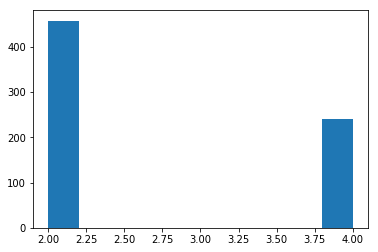

In [27]:
import matplotlib.pyplot as mplt 
import seaborn as sns
mplt.hist(bc_df.Class)

#### Plot the distribution of target variable using histogram

In [ ]:
#see above

### convert the datatype of Bare Nuclei to `int`

In [28]:
bc_df['Bare Nuclei'] = np.int64(bc_df['Bare Nuclei'])
bc_df['Bare Nuclei'].dtypes

dtype('int64')

### Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

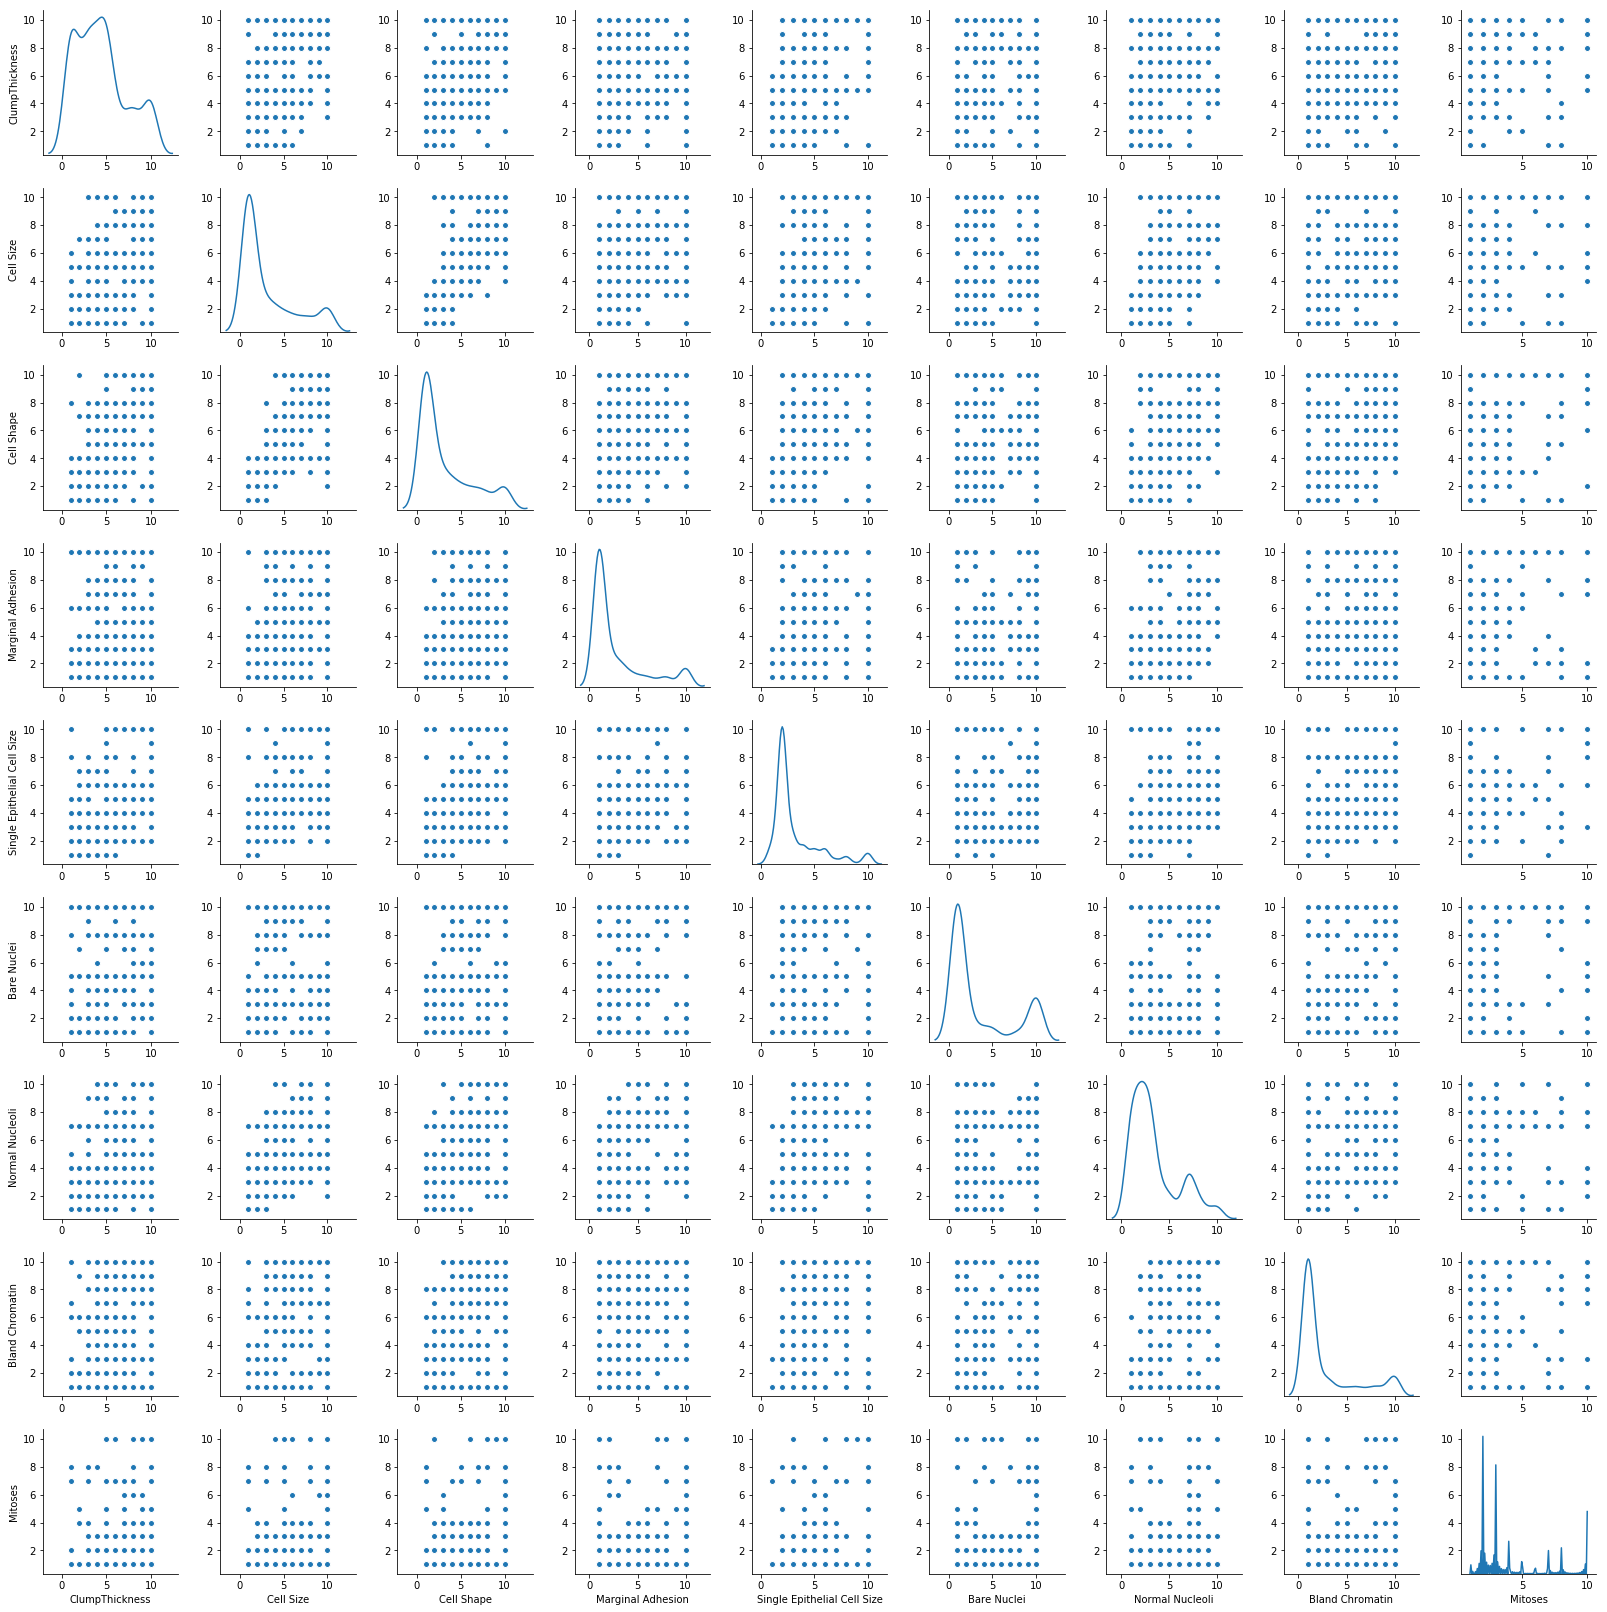

In [57]:
bc_df2 = bc_df.drop(["ID"], axis=1) 
dataframe_attr = bc_df2.iloc[:, 0:9]
sns.pairplot(dataframe_attr, diag_kind='kde')

In [31]:
bc_df2.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


### Divide the dataset into feature set and target set


In [32]:
#Drop Cell Shape as it is highly correlated with the other variables as well
bc_df2 = bc_df2.drop(["Cell Shape"], axis=1) 

### Standardization of Data

In [33]:
from sklearn.preprocessing import StandardScaler
features = bc_df.drop(["ID","Class", "Cell Shape"], axis=1) 

scaler = StandardScaler()
bc_df1 = scaler.fit_transform(features)

bc_scaled_df = pd.DataFrame(bc_df1,columns=features.columns)
bc_scaled_df.head(20) 

,ClumpThickness,Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.206936,-0.699995,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912
1,0.206936,0.283845,0.768621,1.710106,1.799664,-0.179662,-0.284112,-0.343912
2,-0.503866,-0.699995,-0.633247,-0.549561,-0.410685,-0.179662,-0.611825,-0.343912
3,0.562336,1.595632,-0.633247,-0.097628,0.141902,-0.179662,1.354454,-0.343912
4,-0.148465,-0.699995,0.067687,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912
5,1.273138,2.251526,1.820022,1.710106,1.799664,2.282766,1.354454,-0.343912
6,-1.214667,-0.699995,-0.633247,-0.549561,1.799664,-0.179662,-0.611825,-0.343912
7,-0.859266,-0.699995,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912
8,-0.859266,-0.699995,-0.633247,-0.549561,-0.686979,-1.000471,-0.611825,1.990014
9,-0.148465,-0.372048,-0.633247,-0.549561,-0.686979,-0.590067,-0.611825,-0.343912


### Convariance Matrix

In [34]:
bc_cov=np.cov(bc_scaled_df.T)

In [35]:
print("Covariance Matrix:", bc_cov)

('Covariance Matrix:', array([[1.00143266, 0.64583645, 0.48705303, 0.52256381, 0.5908535 ,
        0.5592282 , 0.53660222, 0.35053534],
       [0.64583645, 1.00143266, 0.70659267, 0.75287621, 0.68765657,
        0.75680368, 0.72390044, 0.4593503 ],
       [0.48705303, 0.70659267, 1.00143266, 0.60045809, 0.66792658,
        0.66767051, 0.60421681, 0.41823111],
       [0.52256381, 0.75287621, 0.60045809, 1.00143266, 0.5845377 ,
        0.61698451, 0.62978166, 0.47978787],
       [0.5908535 , 0.68765657, 0.66792658, 0.5845377 , 1.00143266,
        0.67518063, 0.5756016 , 0.34288766],
       [0.5592282 , 0.75680368, 0.66767051, 0.61698451, 0.67518063,
        1.00143266, 0.66683179, 0.34466258],
       [0.53660222, 0.72390044, 0.60421681, 0.62978166, 0.5756016 ,
        0.66683179, 1.00143266, 0.42894941],
       [0.35053534, 0.4593503 , 0.41823111, 0.47978787, 0.34288766,
        0.34466258, 0.42894941, 1.00143266]]))


### Eigen Values and Vectors

In [40]:
eig_vals, eig_vecs = np.linalg.eig(bc_cov)
print("Eigen Values:", eig_vals)
print("Eigen Vectors:", eig_vecs)

('Eigen Values:', array([5.08475454, 0.77095438, 0.5391658 , 0.1828845 , 0.45676821,
       0.37849438, 0.30397392, 0.29446559]))
('Eigen Vectors:', array([[-0.32664377, -0.15824889, -0.87149511,  0.16099104,  0.02209743,
        -0.04335115,  0.27768711,  0.05797876],
       [-0.40439887, -0.05025563,  0.02560923, -0.8692119 , -0.17833405,
         0.12367769,  0.08106893,  0.15517533],
       [-0.36230615, -0.06968341,  0.40420479,  0.14078579,  0.45365438,
        -0.04970493,  0.68601405, -0.04228689],
       [-0.36361315,  0.15444576,  0.11527961,  0.33503904, -0.38619422,
         0.75043612, -0.00805505, -0.07762869],
       [-0.36099971, -0.27058962, -0.02311649, -0.038761  ,  0.5190681 ,
         0.11660328, -0.55887419, -0.44615614],
       [-0.37421773, -0.24972794,  0.18814028,  0.26885318, -0.04454626,
        -0.23039872, -0.33160851,  0.72449024],
       [-0.36292895,  0.01231001,  0.13353667,  0.11254733, -0.52966441,
        -0.57150756, -0.01293015, -0.47989543],
    

### Sort the Eigen values

In [41]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print("Eigen Pairs:", eig_pairs)

('Eigen Pairs:', [(5.084754535817753, array([-0.32664377, -0.40439887, -0.36230615, -0.36361315, -0.36099971,
       -0.37421773, -0.36292895, -0.25339299])), (0.7709543822551276, array([-0.15824889, -0.05025563, -0.06968341,  0.15444576, -0.27058962,
       -0.24972794,  0.01231001,  0.89888156])), (0.5391658027706141, array([-0.87149511,  0.02560923,  0.40420479,  0.11527961, -0.02311649,
        0.18814028,  0.13353667, -0.09698636])), (0.1828844973192077, array([ 0.16099104, -0.8692119 ,  0.14078579,  0.33503904, -0.038761  ,
        0.26885318,  0.11254733, -0.00542306])), (0.4567682121006655, array([ 0.02209743, -0.17833405,  0.45365438, -0.38619422,  0.5190681 ,
       -0.04454626, -0.52966441,  0.24657644])), (0.3784943806127762, array([-0.04335115,  0.12367769, -0.04970493,  0.75043612,  0.11660328,
       -0.23039872, -0.57150756, -0.15459228])), (0.30397392164820614, array([ 0.27768711,  0.08106893,  0.68601405, -0.00805505, -0.55887419,
       -0.33160851, -0.01293015, -0.1

### Explained Variance

In [42]:
eig_tot = sum(eig_vals)#[np.sum(eig_vals) for arr in eig_vals] # [np.sum(arr) for arr in data]
print(eig_tot)
#sum(v for k, v in eig_vals.items() if 'W' in k)
eig_var = [(arr/eig_tot)*100 for arr in eig_vals] # [np.sum(arr) for arr in data]
print(eig_var)

8.011461318051568
[63.46850261088689, 9.623143040309005, 6.72993079996225, 2.282785749799841, 5.701434407122046, 4.724411260152325, 3.794238149328471, 3.6755539824391823]


### Plot the Explained Variance

<Container object of 8 artists>

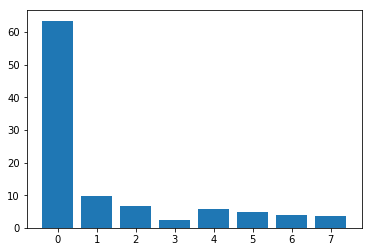

In [45]:
plt.bar(range(8), eig_var)

### Do PCA on feature set using sklearn

In [46]:
w = np.hstack((eig_pairs[0][1].reshape(8,1), eig_pairs[1][1].reshape(8,1)))
print(w)

[[-0.32664377 -0.15824889]
 [-0.40439887 -0.05025563]
 [-0.36230615 -0.06968341]
 [-0.36361315  0.15444576]
 [-0.36099971 -0.27058962]
 [-0.37421773 -0.24972794]
 [-0.36292895  0.01231001]
 [-0.25339299  0.89888156]]


In [48]:
Y = bc_scaled_df.dot(w)
Y.shape

(699, 2)

### Plot 3d-plot of data distribution on first three major PCA dimensions


[-1.24230706e-01 -5.91190859e-01 -8.65093910e-02 -4.26123151e-01
 -1.16832409e-01 -1.52683466e+00 -5.72123522e-01  4.44945761e-02
  2.34739629e+00  1.80193998e-02  3.09371393e-02  1.46984090e-01
 -4.45947974e-01 -4.87880763e-02  5.23859345e-01 -1.74647347e-01
  3.45005684e-02 -6.79889451e-02 -7.37705487e-01 -1.80472466e-01
  4.27631026e-01 -1.06323477e+00  9.07423290e-02 -7.44289241e-01
  1.00736337e-01 -6.42379544e-01  4.46196301e-03 -2.17411922e-02
  1.46984090e-01  3.05715364e-01  2.09431316e-02  4.44945761e-02
  2.17682121e-01  2.00728440e-02  9.07423290e-02  1.46984090e-01
 -9.25699704e-01 -6.76710886e-01 -1.22671619e+00 -6.33471454e-01
 -5.60774359e-01 -3.01459488e-01  3.97822037e-02  2.29648370e-01
 -6.84380228e-01  7.27706521e-01 -7.16649092e-01  2.03225850e-01
 -1.16832409e-01 -2.07521448e-01  1.63576536e+00 -4.42642399e-01
 -2.33774672e-01  2.41894491e+00 -1.10797116e+00 -6.75968482e-01
 -7.13025116e-01  1.28052588e+00 -7.39353971e-01 -7.19285388e-01
 -4.00787323e-01  1.28463

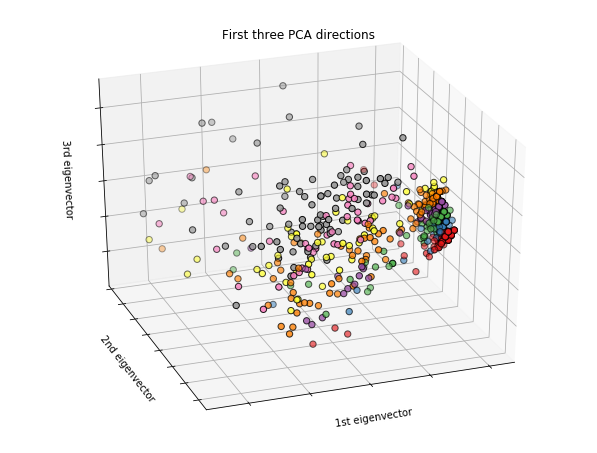

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)


X_test_reduced = PCA(n_components=3).fit_transform(bc_scaled_df) 
print(X_test_reduced[:,1])
ax.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], X_test_reduced[:, 2], c=pd.DataFrame(bc_scaled_df).iloc[:,0].values,
           cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

### Use Logistic Regression model on the dataset under 2 conditions:
1. With all the atttributes
2. With reduced number of attributes

Compare the accuracy of the model under both the cases

In [58]:
t1=bc_df.copy()
t1=t1.drop(["ID"], axis=1)
t1 = t1.mask(t1.sub(t1.mean()).div(t1.std()).abs().gt(2))
print(t1.isnull().sum())
print(t1.shape[0])
t2=t1.copy()
t2 = t2.apply(lambda x: x.fillna(x.median()),axis=0)
print(t2.isnull().sum())
print(t2.shape[0])

ClumpThickness                  0
Cell Size                      67
Cell Shape                     58
Marginal Adhesion              60
Single Epithelial Cell Size    54
Bare Nuclei                     0
Normal Nucleoli                31
Bland Chromatin                77
Mitoses                        34
Class                           0
dtype: int64
699
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64
699


In [ ]:
t2.head()

In [63]:
array = t2.values
X = array[:,[0:9]] # select all rows and first 8 columns which are the attributes
Y = array[:,9]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

SyntaxError: invalid syntax (<ipython-input-63-4d06638253aa>, line 2)